In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
train_data = pd.read_excel(r"C:\Users\naman\Downloads\Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [89]:
## Dealing with Missing Values

In [90]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [91]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [92]:
train_data.shape

(10683, 11)

In [93]:
## Since we have very less null values therefore we can drop those values

In [94]:
train_data.dropna(inplace = True)

In [95]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [96]:
## Creating a copy of our data

In [97]:
data = train_data.copy()
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [98]:
## Converting String data into Numbers or Vectors

In [99]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [100]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col], dayfirst=True)

In [101]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [102]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(feature)

In [103]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [104]:
## Oldest Date

In [105]:
data['Date_of_Journey'].min()

Timestamp('2019-03-01 00:00:00')

In [106]:
data['Date_of_Journey'].max()

Timestamp('2019-06-27 00:00:00')

In [107]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [108]:
data['journey_month']=data['Date_of_Journey'].dt.month

In [109]:
data['journey_year']=data['Date_of_Journey'].dt.year

In [110]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-11-09 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-11-09 05:50:00,2022-11-09 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [111]:
data.drop('Date_of_Journey', axis=1, inplace = True)

In [112]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-11-09 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-11-09 05:50:00,2022-11-09 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [113]:
## Cleaning the Dep_time and Arrival_time

In [114]:
def extract_hour_minute(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+ '_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [115]:
extract_hour_minute(data,'Arrival_Time')

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-11-09 22:20:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-11-09 05:50:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [116]:
extract_hour_minute(data,'Dep_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [117]:
## When will most of the flights will take off

In [118]:
def flight_dep_time(x):
    
    if ( x> 4) and (x<= 8):
        return 'Early Morning'
    elif (x>8) and (x<= 12):
        return 'Morning'
    elif (x>12) and (x<=16):
        return 'Noon'
    elif (x>16) and (x<=20):
        return 'Evening'
    elif (x>20) and (x<=24):
        return 'Late'
    else:
        return 'Late Night'

<AxesSubplot:>

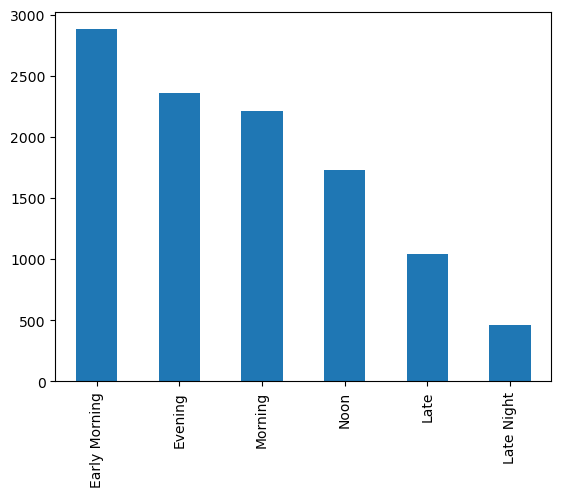

In [119]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [123]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [125]:
cf.go_offline()

In [126]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [127]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,11,25,9,0
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,10,25,18,55
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,5,5,8,0
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,10,25,8,55
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,19,15,11,25


In [128]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h '+x
    elif 'm' not in x:
        x = x+' 0m'
    return x

In [130]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [131]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [134]:
data['Duration'][0].split(' ')[1]

'50m'

In [135]:
data['Duration'][0].split(' ')[0]

'2h'

In [136]:
int(data['Duration'][0].split(' ')[0][0: -1])

2

In [137]:
int(data['Duration'][0].split(' ')[1][0: -1])

50

In [142]:
data['Duration_Hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [141]:
data['Duration_Minutes']=data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [143]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Minutes,Duration_Hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,50,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,25,7


In [144]:
## Duration impacts price or not?

In [146]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [147]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Minutes,Duration_Hours,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,50,2,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,25,7,445


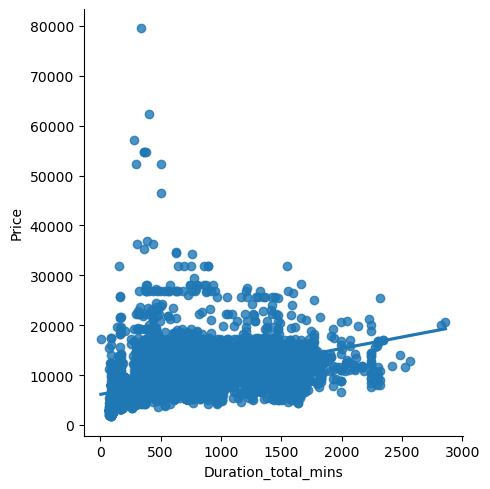

In [149]:
sns.lmplot(x = 'Duration_total_mins', y = 'Price', data = data, hue_order= 'red')

In [150]:
## Which city has the maximum final destination of flights?

In [151]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot:ylabel='Destination'>

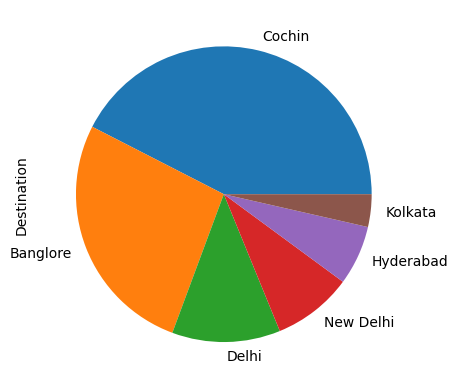

In [156]:
data['Destination'].value_counts().plot(kind = 'pie')

In [157]:
## Dealing with New Delhi and Delhi, Since both are the same

In [158]:
## Jet airways airline only

In [159]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [162]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [165]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size()

Route
BLR → BDQ → DEL            8
BLR → BOM → DEL          385
BLR → BOM → JDH → DEL      3
BLR → DEL                382
BLR → MAA → DEL           10
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → DEL → HYD            5
BOM → HYD                207
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
CCU → BOM → BLR          930
CCU → BOM → PNQ → BLR      4
CCU → DEL → BLR          300
CCU → GAU → BLR           22
DEL → AMD → BOM → COK    141
DEL → ATQ → BOM → COK     38
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → BOM → COK          875
DEL → CCU → BOM → COK      1
DEL → COK                 34
DEL → DED → BOM → COK      2
DEL → IDR → BOM → COK     86
DEL → IXC → BOM → COK     13
DEL → JAI → BOM → COK    207
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → MAA → BOM → COK     16
DEL → NAG → BOM → COK     61
DEL → UDR → BOM → COK      7
dtype: int64

In [167]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [168]:
## Airline Vs Price Analysis. Finding the Price Distribution according to flight

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

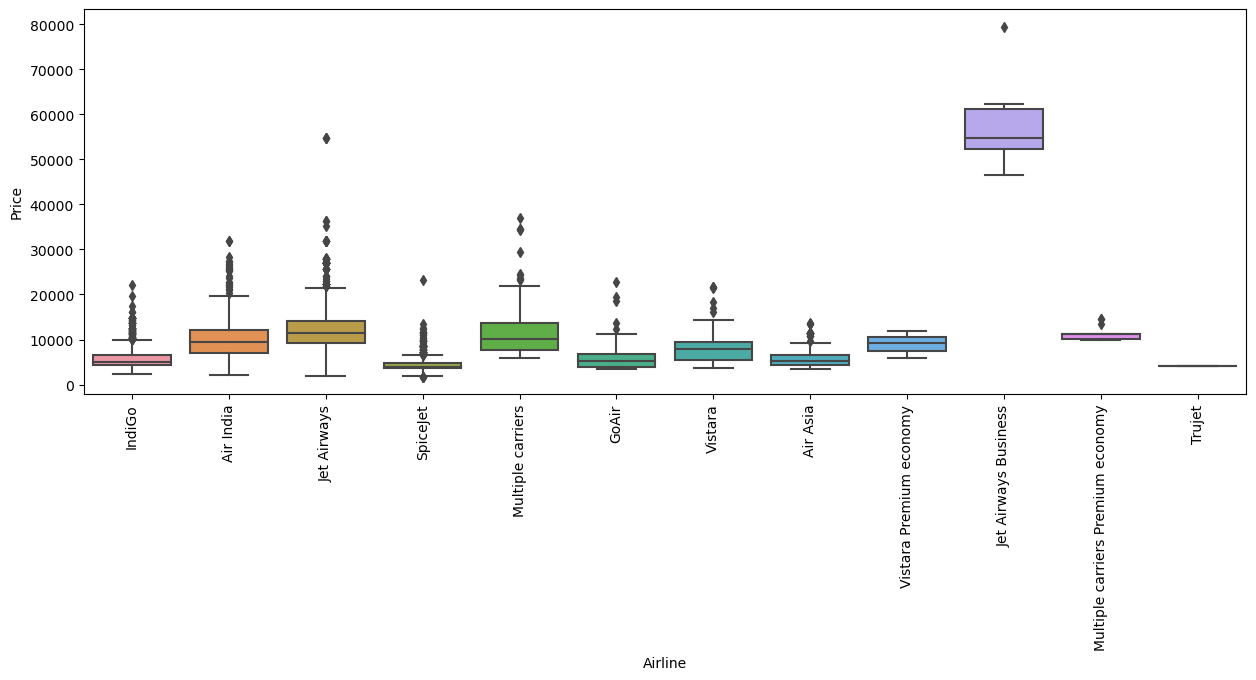

In [176]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline', y='Price', data = data)
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

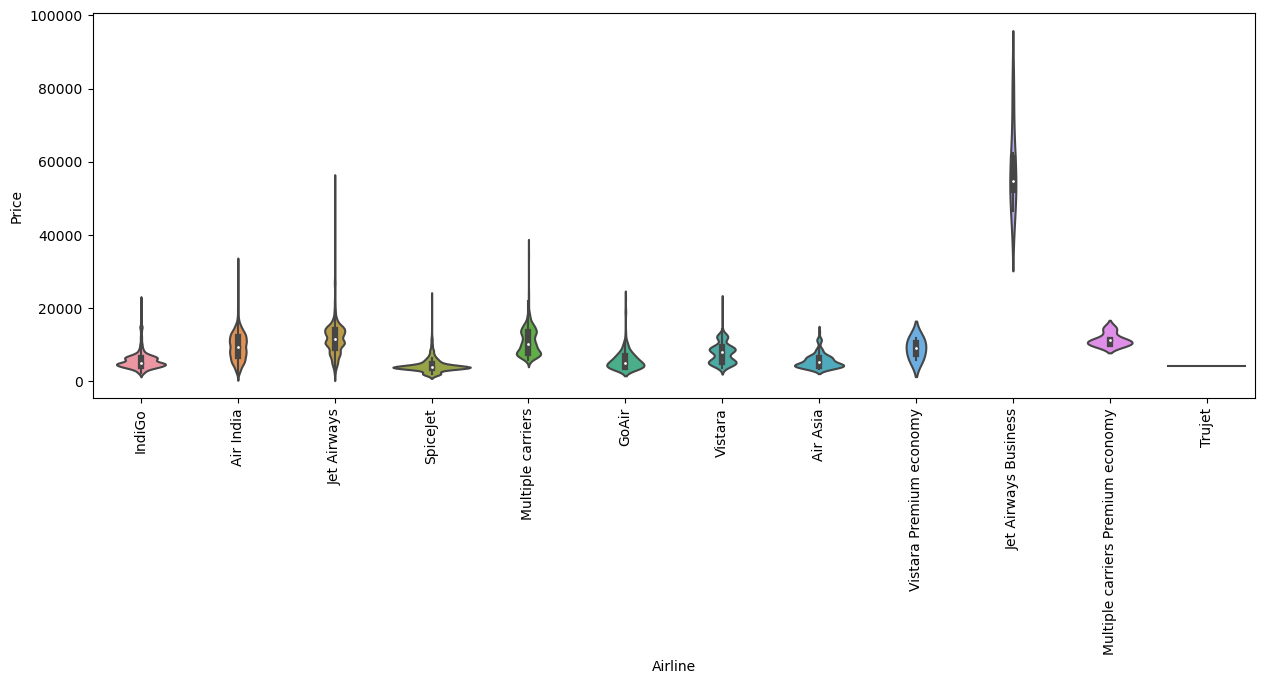

In [178]:
plt.figure(figsize = (15,5))
sns.violinplot(x = 'Airline', y= 'Price', data = data)
plt.xticks(rotation = 'vertical')

In [179]:
## one hot enconding

In [180]:
data['Additional_Info'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10682 entries, 0 to 10682
Series name: Additional_Info
Non-Null Count  Dtype 
--------------  ----- 
10682 non-null  object
dtypes: object(1)
memory usage: 424.9+ KB


In [182]:
data.drop(columns = ['Additional_Info','Route','Duration_total_mins','journey_year'], axis=1, inplace = True)

In [183]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Minutes,Duration_Hours
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20,50,2
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,13,15,5,50,25,7


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Duration             10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Price                10682 non-null  int64 
 6   journey_day          10682 non-null  int64 
 7   journey_month        10682 non-null  int64 
 8   Arrival_Time_hour    10682 non-null  int64 
 9   Arrival_Time_minute  10682 non-null  int64 
 10  Dep_Time_hour        10682 non-null  int64 
 11  Dep_Time_minute      10682 non-null  int64 
 12  Duration_Minutes     10682 non-null  int64 
 13  Duration_Hours       10682 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.5+ MB


In [191]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [192]:
num_col = [col for col in data.columns if data[col].dtype != 'object']

In [194]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [196]:
data['Source'].apply(lambda x: 1 if x == 'Bangalore' else 0)

0        0
1        0
2        0
3        0
4        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    0
Name: Source, Length: 10682, dtype: int64

In [198]:
for category in data['Source'].unique():
    data['Source'+category]=data['Source'].apply(lambda x: 1 if x== category else 0)

In [199]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Minutes,Duration_Hours,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20,50,2,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,13,15,5,50,25,7,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,4,25,9,25,0,19,0,0,1,0,0


In [201]:
## Target guided Encoding

In [204]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [207]:
dict1 = {key:index for index,key in enumerate(airlines,0)}

In [208]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [239]:
data['Airlines'] = data['Airline'].map(dict1)

In [240]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Minutes,Duration_Hours,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai,Airlines
0,IndiGo,2,0,3897.0,24,3,1,10,22,20,50,2,1,0,0,0,0,3
1,Air India,3,2,7662.0,1,5,13,15,5,50,25,7,0,1,0,0,0,7


In [213]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [214]:
data['Destination'].replace('New Delhi','Delhi', inplace = True)

In [215]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [216]:
dict2 = {key:index for index,key in enumerate(dest,0)}

In [217]:
data['Destination'] = data['Destination'].map(dict2)

In [218]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [219]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [220]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [221]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [223]:
## Outliers Detection
## 1. Distribution plot
## 2. Histogram
## 3. boxplot

In [230]:
def plot(df,col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde = False)

C:\Users\naman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\naman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



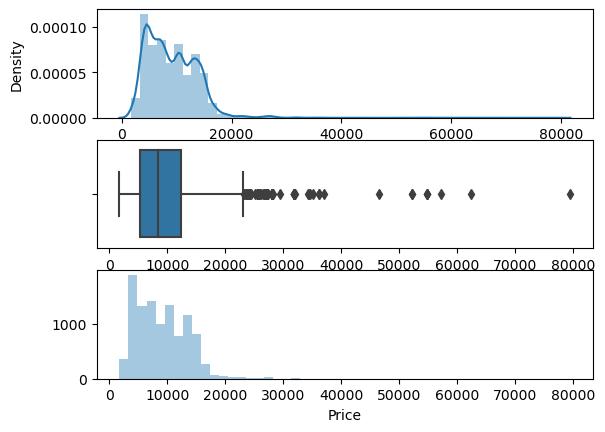

In [231]:
plot(data,'Price')

In [232]:
## replacing the outliers with median values

In [234]:
data['Price']=np.where(data['Price']>= 35000, data['Price'].median(), data['Price'])

C:\Users\naman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\naman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\naman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



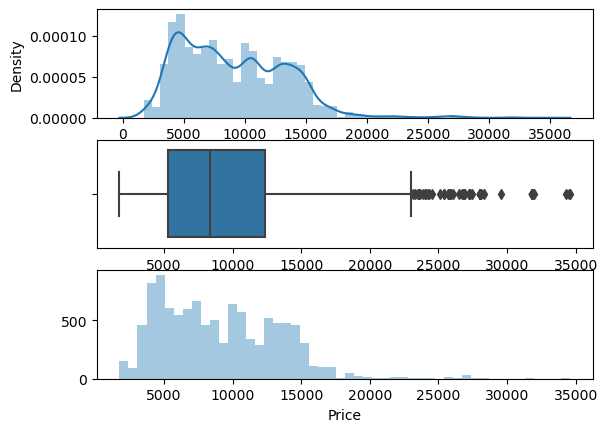

In [235]:
plot(data,'Price')

In [236]:
## Feature Selection

In [242]:
data.drop(columns = ['Source','Duration'],axis =1, inplace=True)

KeyError: "['Source', 'Duration'] not found in axis"

In [241]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Minutes,Duration_Hours,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai,Airlines
0,IndiGo,2,0,3897.0,24,3,1,10,22,20,50,2,1,0,0,0,0,3
1,Air India,3,2,7662.0,1,5,13,15,5,50,25,7,0,1,0,0,0,7


In [243]:
data.drop(columns = ['Airline'],axis =1, inplace=True)

In [244]:
data.head(2)

,Destination,Total_Stops,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Minutes,Duration_Hours,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai,Airlines
0,2,0,3897.0,24,3,1,10,22,20,50,2,1,0,0,0,0,3
1,3,2,7662.0,1,5,13,15,5,50,25,7,0,1,0,0,0,7


In [246]:
data.dtypes

Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Duration_Minutes         int64
Duration_Hours           int64
SourceBanglore           int64
SourceKolkata            int64
SourceDelhi              int64
SourceChennai            int64
SourceMumbai             int64
Airlines                 int64
dtype: object

In [ ]:
## SelectKBest

In [247]:
from sklearn.feature_selection import mutual_info_regression

In [249]:
X= data.drop(['Price'],axis =1)

In [250]:
Y=data['Price']

In [251]:
mutual_info_regression(X,Y) #measures the dependencies bw two variables, if = 0 the two ariables are independent.

array([0.99382452, 0.79641618, 0.22646619, 0.61983707, 0.40716311,
       0.35414659, 0.34108298, 0.25628869, 0.35530229, 0.46485865,
       0.38929003, 0.44558179, 0.51668574, 0.1411739 , 0.19267044,
       0.96902816])

In [254]:
imp = pd.DataFrame(mutual_info_regression(X,Y),index=X.columns)
imp.columns = ['Importance']

In [256]:
imp.sort_values('Importance', ascending=False)

,Importance
Destination,1.006564
Airlines,0.980143
Total_Stops,0.784284
journey_month,0.627234
SourceDelhi,0.521985
Duration_Hours,0.464666
SourceKolkata,0.456891
Arrival_Time_hour,0.396620
SourceBanglore,0.387589
Arrival_Time_minute,0.353794


In [257]:
## Building the ML Model

In [258]:
from sklearn.model_selection import train_test_split

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [262]:
from sklearn.ensemble import RandomForestRegressor

In [263]:
ml_model = RandomForestRegressor()

In [265]:
model = ml_model.fit(X_train, y_train)

In [267]:
y_pred = model.predict(X_test)

In [268]:
y_pred.shape

(2671,)

In [269]:
len(X_test)

2671

In [270]:
## Saving the model

In [272]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [273]:
import pickle

In [275]:
file = open('D:\Python Projects\Flight_Price_Prediction/rf_random.pk1','wb')

In [276]:
pickle.dump(model,file)

In [280]:
model = open('D:\Python Projects\Flight_Price_Prediction/rf_random.pk1','rb')

In [281]:
forest = pickle.load(model)

In [282]:
forest.predict(X_test)

array([16779.5 ,  5452.49,  8908.32, ...,  3506.87,  6197.82,  6872.83])

In [285]:
## Defining the Evaluation Metric

In [287]:
def mape(y_true,y_pred):
    np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/(y_true))*100)

In [289]:
mape(y_test,forest.predict(X_test))

13.135075206015612

In [295]:
def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('Training_Score: {}'.format(model.score(X_train,y_train)))
    y_prediction =model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')

    from sklearn import metrics
    r2_score = metrics.r2_score(y_test, y_prediction)
    print ('r2_score:{}'.format(r2_score))
    print ('MSE : ',metrics.mean_squared_error(y_test,y_prediction))
    print ('MAE : ',metrics.mean_absolute_error(y_test,y_prediction))
    print ('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print ('MAPE : ',mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)

Training_Score: 0.9515819807095801
Predictions are : [16871.85  5418.7   8768.12 ...  3548.2   6287.49  6862.84]


r2_score:0.8082913203756925
MSE :  3732107.827314223
MAE :  1181.1977019430715
RMSE :  1931.8664103178105
MAPE :  13.221477651586905


C:\Users\naman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



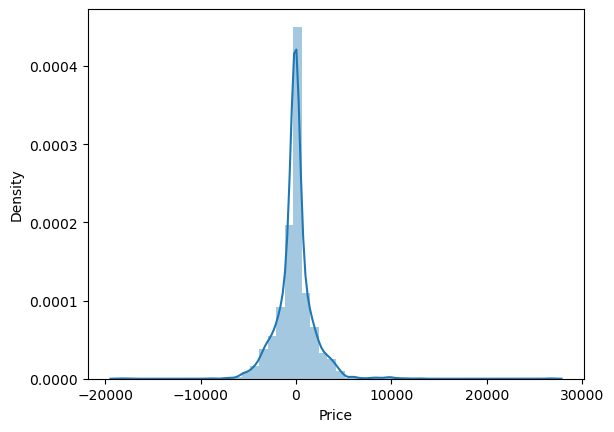

In [296]:
predict(RandomForestRegressor())